# Part I: Data Preparation

## Read data from csv

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [469]:
DATA_DIR = 'data'
CSV_FILE = DATA_DIR + '/' + 'KaggleV2-May-2016.csv'

# read data using read_csv function
dt = pd.read_csv(CSV_FILE)
dt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [478]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df
dt_clean = dt.copy()
dt_clean.columns = ['patient_id','appointment_id','gender','schedule_day','appointment_day',
                    'age','neighbourhood','scholarship','hipertension','diabetes','alcoholism','handicap','sms_received','noshow']
dt_clean.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5675305.123427,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,71295.751540,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5030230.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5640285.500000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5680573.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5725523.500000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5790484.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The only issue here seems to be age having a minimum value of -1.

In [479]:
dt_clean[dt_clean['age'] == -1]

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,noshow
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is only one entry with a negative age. We can replace the age with the mean age in the dataset.

In [480]:
dt_clean=dt_clean.replace(-1,int(dt_clean['age'].mean()))
dt_clean['age'].describe()

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5f8b5850>]], dtype=object)

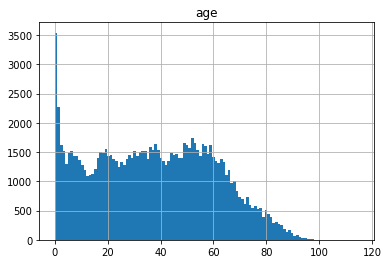

In [481]:
dt_clean.hist(column='age',bins=dt_clean['age'].max()+1)

Histogram shows a larger than normal amount of patients with age 0? Is this a mistake or do we have higher than normal amount of babies as patients? For Now I will leave these in as my guess is that this is usable data.

## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [482]:
PROCESSED_DATA_DIR = 'processed_data/'

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

# view current counts
print dt_clean['noshow'].value_counts() / len(dt_clean)
print '\n Total data: '+str(len(dt_clean))

No     0.798067
Yes    0.201933
Name: noshow, dtype: float64

 Total data: 110527


In [483]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=1234)
for train_index, test_index in split.split(dt_clean, dt_clean["noshow"]):
    train_set = dt_clean.loc[train_index]
    test_set = dt_clean.loc[test_index]
    
print train_set["noshow"].value_counts() / len(train_set)
print '\n Total data: '+str(len(train_set))
print '------------'
print test_set['noshow'].value_counts() / len(test_set)
print '\n Total data: '+str(len(test_set))

# seems to have worked...

No     0.798071
Yes    0.201929
Name: noshow, dtype: float64

 Total data: 90527
------------
No     0.79805
Yes    0.20195
Name: noshow, dtype: float64

 Total data: 20000


In [484]:
# save everything
if 1:
    train_set.to_csv(PROCESSED_DATA_DIR+'train_set.csv')
    test_set.to_csv(PROCESSED_DATA_DIR+'test_set.csv')
else:
    train_set = pd.read_csv(PROCESSED_DATA_DIR+'train_set.csv')

dt_clean = train_set.copy()
dt_clean.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,noshow
80222,7.837853e+12,5673464,F,2016-05-09T09:23:41Z,2016-05-09T00:00:00Z,1,CENTRO,0,0,0,0,0,0,No
28379,9.129977e+12,5625339,F,2016-04-27T07:08:52Z,2016-05-02T00:00:00Z,66,REDENÇÃO,0,1,0,0,0,1,No
88544,5.546643e+13,5763738,F,2016-06-02T09:20:39Z,2016-06-03T00:00:00Z,39,ESTRELINHA,0,1,0,0,0,0,No
440,8.366249e+13,5639495,F,2016-04-29T09:09:55Z,2016-04-29T00:00:00Z,25,SÃO BENEDITO,1,0,0,0,0,0,Yes
74934,4.535866e+13,5623265,F,2016-04-26T13:46:56Z,2016-05-06T00:00:00Z,9,SÃO PEDRO,0,0,0,0,0,1,No


## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

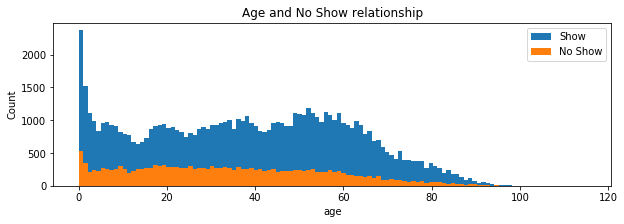

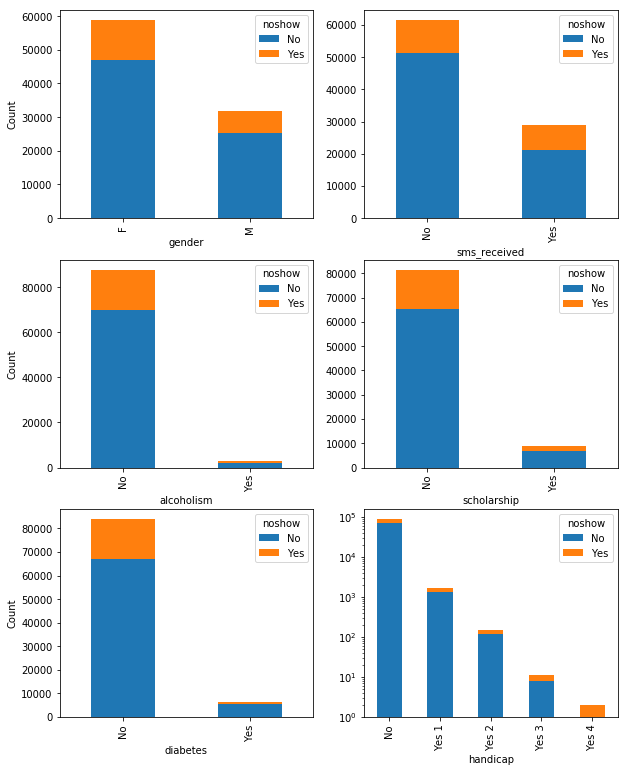

In [485]:
# Make plots here!

# age histogram
plt.figure(figsize=(10,3))
dt_clean['age'][dt_clean['noshow'] == 'No'].hist(label='Show', bins = 116)
dt_clean['age'][dt_clean['noshow'] == 'Yes'].hist(label='No Show', bins = 116)
plt.title('Age and No Show relationship'); plt.xlabel('age'); plt.ylabel('Count'); plt.grid(False); plt.legend();

###################### other histograms
plt.figure(figsize=(10,13))

columns = ['gender','sms_received','alcoholism','scholarship','diabetes','handicap']
hcap = False
for i,col in enumerate(columns):
    axs=plt.subplot(3,2,i+1)
    if col == 'handicap':
        hcap=True
    pd.crosstab(dt_clean[col],dt_clean['noshow']).plot(kind='bar',stacked=True, ax=axs, log=hcap, color=['C0','C1'])
    if (i+1) % 2 == 1:
        plt.ylabel('Count')
    if (i>0 and i<5):
        axs.set_xticklabels(('No','Yes'))
    elif(i==5):
        axs.set_xticklabels(('No','Yes 1','Yes 2','Yes 3','Yes 4'))

All level 4 handicap people (not sure what this means) have always been no shows.

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [486]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn_pandas import DataFrameMapper
from datetime import datetime

# util custom pipeline transformers
class BinAttribute(BaseEstimator, TransformerMixin):
    # custom class to return already existing binary data
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X

def Date2Weekday(data):
    # for appointment_day attribute
    # convert date to weekday. Sunday - 0 and Saturday - 6 , can later apply labelbinarizer
    newdata = []
    for dt in data:
        newdata.append(datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').weekday())
    return newdata

def Date2Epoch(data):
    # for schedule_day attribute
    # convert date to epoch time , can later apply standardscaler
    newdata = []
    for dt in data:
        newdata.append((datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ') - datetime(1970,1,1)).total_seconds())
    return newdata

In [521]:
# define attribute categories
cat_attributes = ['gender','handicap','neighbourhood'] # categorical attributes
num_attributes = ['age','patient_id','appointment_id','schedule_day'] # numerical attributes , not sure how useful the patient/appointmend id will be.
bin_attributes = ['scholarship','hipertension','diabetes','alcoholism','sms_received'] # existing binary data attributes
del_attributes = ['noshow'] # attributes not being used

dt_clean_label = dt_clean.copy()
# delete noshow variable
dt_clean_label = dt_clean_label.drop(del_attributes, axis=1)
# apply some custom transformations
dt_clean_label['appointment_day'] = Date2Weekday(dt_clean_label['appointment_day'])
dt_clean_label['schedule_day'] = Date2Epoch(dt_clean_label['schedule_day'])

#### pipelines

# numerical
num_pipeline = Pipeline([
    ('num_attrib', StandardScaler())
])

# made custon class to easily fit existing binary data into the pipeline
bin_pipeline = Pipeline([
    ('bin_attrib', BinAttribute())
])

# We are working with pandas dataframes and not np arrays so use DataFrameMapper
full_pipeline = DataFrameMapper([
    ('gender', LabelBinarizer()), # Couldn't figure out a way to iteratively call LabelBinarizer, so have unique call for each attribute
    ('handicap', LabelBinarizer()),
    ('neighbourhood', LabelBinarizer()),
    ('appointment_day', LabelBinarizer()), # converted to day of the week
    (num_attributes, num_pipeline),
    (bin_attributes, bin_pipeline)
])

In [522]:
# dataframe before pipeline
dt_clean_label.head()

,patient_id,appointment_id,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received
80222,7.837853e+12,5673464,F,1462785821,0,1,CENTRO,0,0,0,0,0,0
28379,9.129977e+12,5625339,F,1461740932,0,66,REDENÇÃO,0,1,0,0,0,1
88544,5.546643e+13,5763738,F,1464859239,4,39,ESTRELINHA,0,1,0,0,0,0
440,8.366249e+13,5639495,F,1461920995,4,25,SÃO BENEDITO,1,0,0,0,0,0
74934,4.535866e+13,5623265,F,1461678416,4,9,SÃO PEDRO,0,0,0,0,0,1


In [523]:
# post pipeline transformation
dt_transformed=full_pipeline.fit_transform(dt_clean_label)
pd.DataFrame(dt_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0,1,0,0,0,0,0,0,0,0,...,0,-1.562378,-0.544976,-0.026752,0.002556,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1.249399,-0.539932,-0.701713,-0.629524,0,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0.081430,-0.359036,1.239357,1.256818,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,-0.524183,-0.248960,-0.503173,-0.520599,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,-1.216313,-0.398496,-0.730801,-0.667342,0,0,0,0,1


102 total columns here makes sense.

Columns:

gender - 1 (male or female)  
handicap - 5 (5 levels of handicap ranging from 0 - 4)  
neighbourhoods - 81 (unique neighbourhoods)  
appointment_day - 6 (had appointments 6 days of the week)  
numeric attributes - 4 (age,patient_id,appointment_id,schedule_day in epoch time)  
binary attributes - 5 (scholarship,hipertension,diabetes,alcoholism,sms_received)  

Total: 102 features